# Cluster Analysis Methodology

![](banner_cluster_analysis.jpg) 


_<p style="text-align: center;"> The platypus lays eggs like a bird does and produces milk like a mammal does. </p>_

In [43]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

Cluster analysis methods construct models that organize data into distinct classes.

## Terminology

Here are some new terms we will use in our discourse.

Cluster analysis is a kind of **descriptive data analytics**, also known as **descriptive data mining**, also known as **unsupervised machine learning**.  Descriptive data analytic methods construct descriptive models that potentially expose interesting relationships in data.

A **cluster analysis method** constructs a cluster model from some reference data.

A **cluster model** is a kind of descriptive model that exposes similarity/dissimilarity among observations by organizing the observations into separate classes.

**Training** is the process of constructing a model from some reference data.  **Evaluation** is the process of assessing the quality or usefulness of a model.

The **dispersion ratio** of a cluster model is a way to measure of the quality or usefulness of the model.

## Cluster Analysis Methodology

**Training**

<img src="cluster_train.jpg" align="left" width="440">

**Evaluation**

<img src="cluster_evaluate.jpg" align="left" width="440">

## Some Cluster Models

### Data

In [44]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 
 
 b 
 2.5 
 9.0 
 9.0 
 
 
 c 
 4.0 
 8.5 
 10.5 
 
 
 d 
 6.5 
 11.0 
 2.0 
 
 
 e 
 8.0 
 2.5 
 1.5 
 
 
 f 
 9.0 
 1.0 
 1.0 
 
 
 g 
 10.0 
 4.0 
 9.5 
 
 
 h 
 10.5 
 7.5 
 11.0

Normalize the data.

In [45]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
data = setNames(cbind(data, scale(data[, c("x1","x2","x3")])), c(names(data), c("z1","z2","z3")))
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165

Class values are initially unknown.

In [46]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
data = setNames(cbind(data, scale(data[, c("x1","x2","x3")])), c(names(data), c("z1","z2","z3")))
data$class = NA
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 NA 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 NA 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 NA 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 NA 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 NA 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 NA 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 NA 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 NA

### Cluster Model in 1 Variable

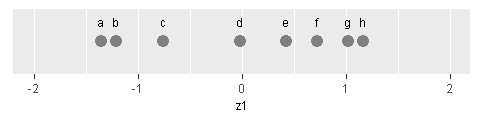

In [47]:
output_size(4,1)
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend
output_size(restore)

Cluster at random.  Perhaps 2 clusters: Size of Cluster A is 3, Size of Cluster B is then 5.  Cluster A is observations cfg, Cluster B is then observations abdeh.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 B 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 B 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 A 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 A 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

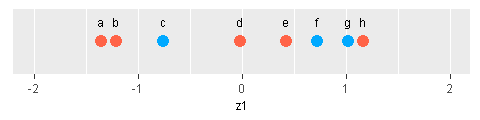

In [48]:
data$class = c("B","B","A","B","B","A","A","B")
fmt(data)

output_size(4,1)
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend
output_size(restore)

Cluster by observation similarity.  Perhaps 2 clusters: Cluster A is observations abc, Cluster B is observations defgh.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 B 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 B 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

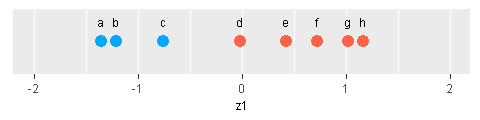

In [49]:
data$class = c("A","A","A","B","B","B","B","B")
fmt(data)

output_size(4,1)
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend
output_size(restore)

### Cluster Model in 2 Variables

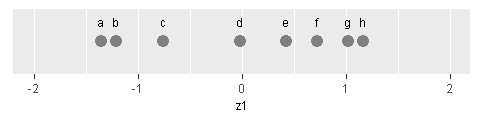

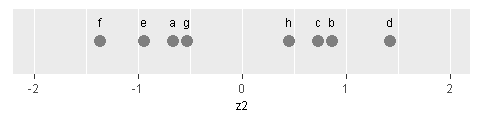

In [50]:
output_size(4,1)

ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend

ggplot(data) + xlim(-2,2) + geom_point(aes(x=z2, y=""), color="gray50") + geom_text(aes(x=z2, y="", label=name)) +
theme.x_axis_only + theme.no_legend

output_size(restore)

z1 suggests perhaps 2 clusters: Cluster A is observations abc, Cluster B is observations defgh.

z2 suggests perhaps 2 clusters: Cluster A is observations aefg, Cluster B is observations bcdh.

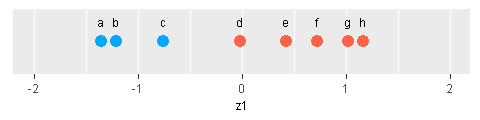

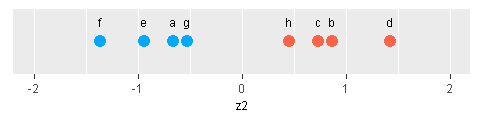

In [51]:
output_size(4,1)

cluster.try = c("A","A","A","B","B","B","B","B")
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y="", color=cluster.try)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend

cluster.try = c("A","B","B","B","A","A","A","B")
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z2, y="", color=cluster.try)) + geom_text(aes(x=z2, y="", label=name)) +
theme.x_axis_only + theme.no_legend

output_size(restore)

Consider distribution of z1,z2 values.

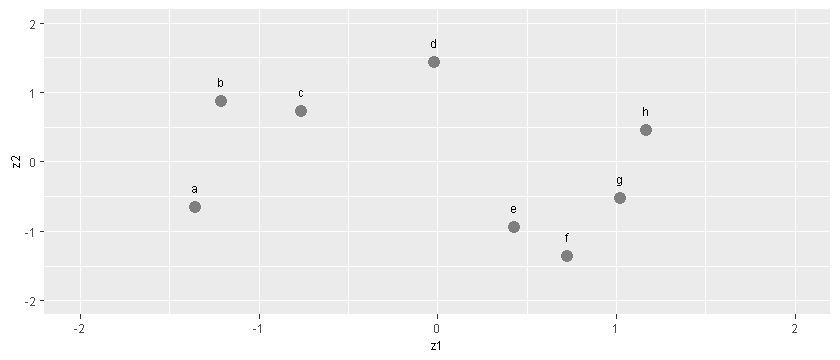

In [52]:
ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2), color="gray50") + geom_text(aes(x=z1, y=z2, label=name)) +
theme.no_legend

z1,z2 suggests perhaps 2 clusters: Cluster A is observations abcd, Cluster B is observations efgh.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 A 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 B 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 B 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

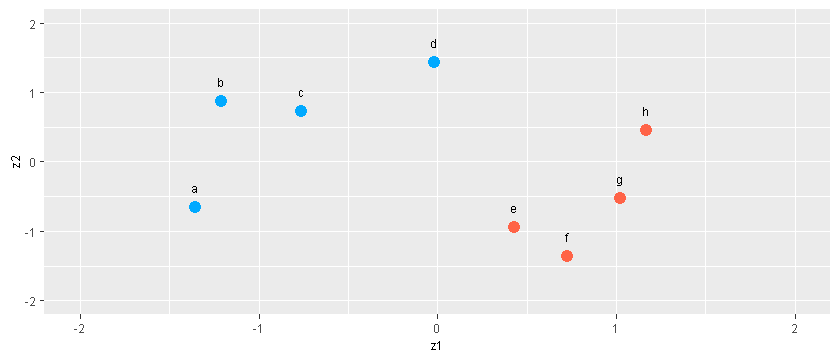

In [53]:
data$class = c("A","A","A","A","B","B","B","B")
fmt(data)

ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2, color=class)) + geom_text(aes(x=z1, y=z2, label=name)) +
theme.no_legend

### Cluster Models in 3 Variables 

Consider distribution of z1 values, distribution of z2 values, distribution z3 values.

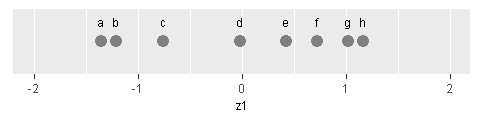

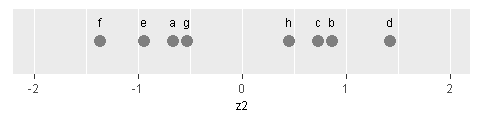

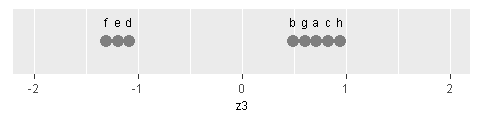

In [54]:
output_size(4,1)

ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend

ggplot(data) + xlim(-2,2) + geom_point(aes(x=z2, y=""), color="gray50") + geom_text(aes(x=z2, y="", label=name)) +
theme.x_axis_only + theme.no_legend

ggplot(data) + xlim(-2,2) + geom_point(aes(x=z3, y=""), color="gray50") + geom_text(aes(x=z3, y="", label=name)) +
theme.x_axis_only + theme.no_legend

output_size(restore)

Consider distribution of z3 values.

z1 suggests perhaps 2 clusters: Cluster A is observations abc, Cluster B is observations defgh.

z2 suggests perhaps 2 clusters: Cluster A is observations aefg, Cluster B is observations bcdh.

z3 suggests perhaps 2 clusters: Cluster A is observations def, Cluster B is observations abcgh.

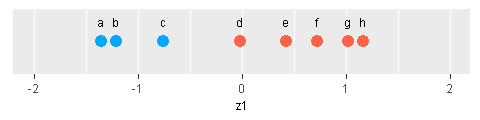

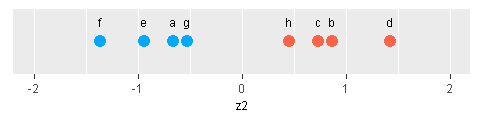

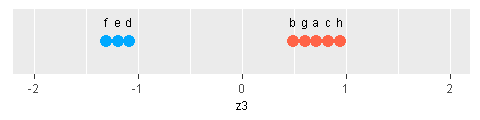

In [55]:
output_size(4,1)

cluster.try = c("A","A","A","B","B","B","B","B")
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z1, y="", color=cluster.try)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.no_legend

cluster.try = c("A","B","B","B","A","A","A","B")
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z2, y="", color=cluster.try)) + geom_text(aes(x=z2, y="", label=name)) +
theme.x_axis_only + theme.no_legend

cluster.try = c("B","B","B","A","A","A","B","B")
ggplot(data) + xlim(-2,2) + geom_point(aes(x=z3, y="", color=cluster.try)) + geom_text(aes(x=z3, y="", label=name)) +
theme.x_axis_only + theme.no_legend

output_size(restore)

Consider distribution of z1,z2 values.

z1,z2 suggests perhaps 2 clusters: Cluster A is observations abcd, Cluster B is observations efgh.

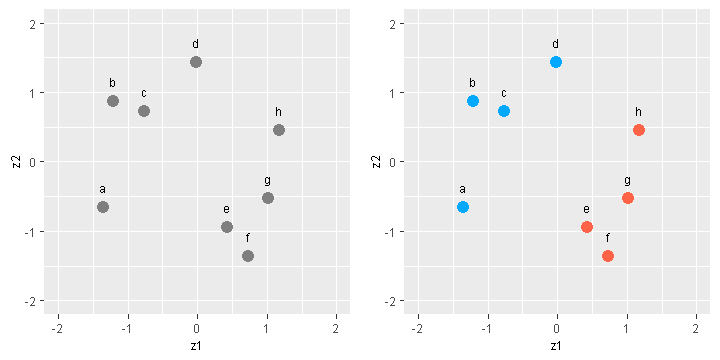

In [56]:
cluster.try = c("A","A","A","A","B","B","B","B")

output_size(6,3)

p1 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2), color="gray50") + geom_text(aes(x=z1, y=z2, label=name)) +
     theme.no_legend

p2 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2, color=cluster.try)) + geom_text(aes(x=z1, y=z2, label=name)) +
     theme.no_legend

grid.arrange(p1, p2, nrow=1)

output_size(restore)

Consider distribution of z1,z3 values.

z1,z3 suggests perhaps 3 clusters: Cluster A is observations abc, Cluster B is observations def, Cluster C is observations gh.

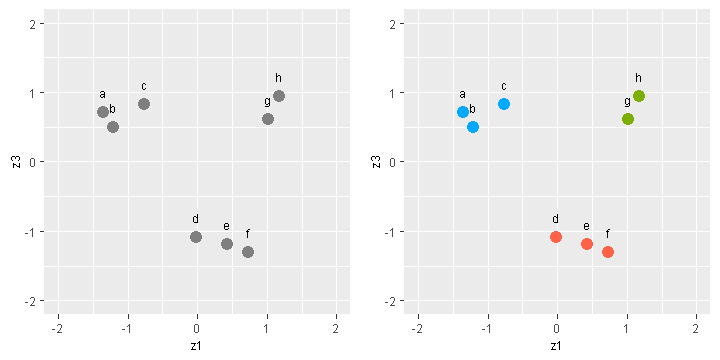

In [57]:
cluster.try = c("A","A","A","B","B","B","C","C")

output_size(6,3)

p1 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z3), color="gray50") + geom_text(aes(x=z1, y=z3, label=name)) +
     theme.no_legend

p2 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z3, color=cluster.try)) + geom_text(aes(x=z1, y=z3, label=name)) +
     theme.no_legend

grid.arrange(p1, p2, nrow=1)

output_size(restore)

Consider distribution of z2,z3 values.

z2,z3 suggests perhaps 4 clusters: Cluster A is observations ef, Cluster B is observations ag, Cluster C is observations bch, Cluster D is observation d.

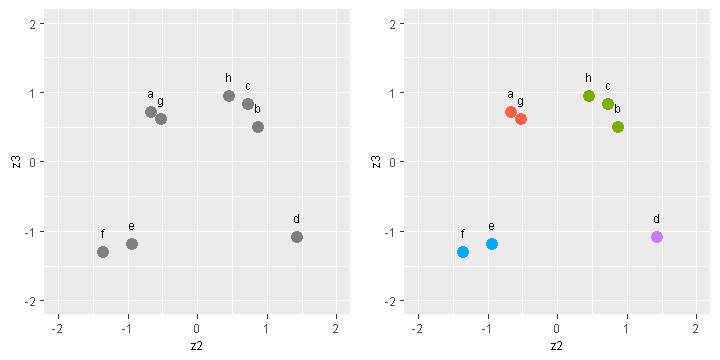

In [58]:
cluster.try = c("B","C","C","D","A","A","B","C")

output_size(6,3)

p1 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z2, y=z3), color="gray50") + geom_text(aes(x=z2, y=z3, label=name)) +
     theme.no_legend

p2 = ggplot(data) + xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z2, y=z3, color=cluster.try)) + geom_text(aes(x=z2, y=z3, label=name)) +
     theme.no_legend

grid.arrange(p1, p2, nrow=1)

output_size(restore)

Consider distribution of z1,z2,z3 values.

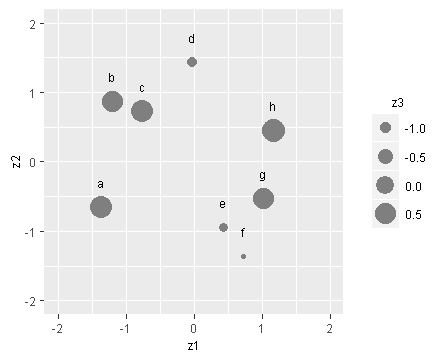

In [59]:
output_size(3.7,3)
ggplot(data) + xlim(-2,2) + ylim(-2,2) +
geom_point(aes(x=z1, y=z2, size=z3), color="gray50") + geom_text(aes(x=z1, y=z2, label=name), vjust=-2) +
theme.legend_title
output_size(restore)

z1,z2,z3 suggests perhaps 4 clusters: Cluster A is observations abc, Cluster B is observations d, Cluster C is observations ef, Cluster D is observation gh.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 C 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 C 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 D

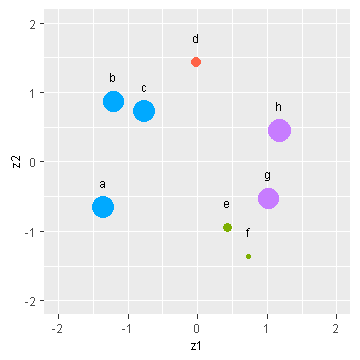

In [60]:
data$class = c("A","A","A","B","C","C","D","D")

fmt(data)

output_size(3,3)
ggplot(data) + xlim(-2,2) + ylim(-2,2) +
geom_point(aes(x=z1, y=z2, size=z3, color=class)) + geom_text(aes(x=z1, y=z2, label=name), vjust=-2) +
theme.no_legend
output_size(restore)

In [61]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

## Many Possible Cluster Models

In [62]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

In [63]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(2,1,1,1,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

In [64]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,2,2,3,4,4,2,2)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

## Observation Dissimilarity

In [65]:
fmt(data[1:2, ])

data[1:2, ] 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10 
 -1.356244 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9 
 -1.207615 
 0.8721267 
 0.4918370 
 A

Distance between 2 observations in 1 variable.

$
distance = \, \mid b_{z_1} - a_{z_1} \mid
$

distance_a_b
1 0.1486295

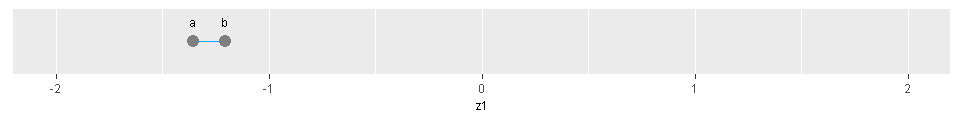

In [66]:
distance_a_b = abs(data[1,"z1"] - data[2,"z1"])
data.frame(distance_a_b)

output_size(8,1)
ggplot(data[1:2,]) + xlim(-2,2) + 
geom_segment(x=data[1,"z1"], y=0, xend=data[2,"z1"], yend=0) +
geom_point(aes(x=z1, y=0), color="gray50") +
geom_text(aes(x=z1, y=0, label=name)) +
theme.x_axis_only + theme.no_legend
output_size(restore)

Distance between 2 observations in 2 variables. (Pythagorean Theorem)

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 }
$

distance_a_b
1 1.542122

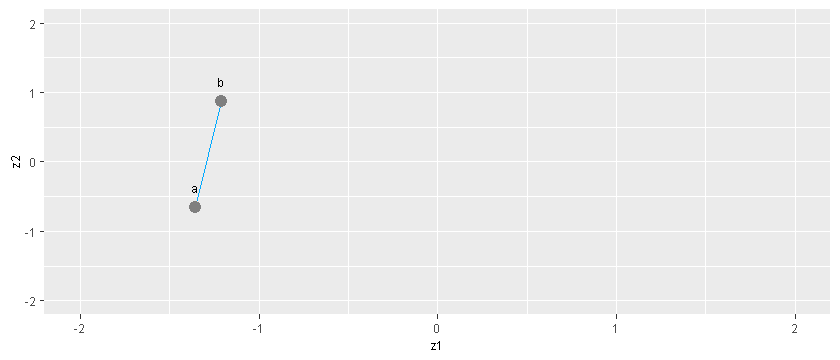

In [67]:
distance_a_b = sqrt((data[1,"z1"]-data[2,"z1"])^2 + (data[1,"z2"]-data[2,"z2"])^2)
data.frame(distance_a_b)

ggplot(data[1:2,]) + xlim(-2,2) + ylim(-2,2) +
geom_segment(x=data[1,"z1"], y=data[1,"z2"], xend=data[2,"z1"], yend=data[2,"z2"]) +
geom_point(aes(x=z1, y=z2), color="gray50") +
geom_text(aes(x=z1, y=z2, label=name)) +
theme.no_legend

Distance between 2 observations in 3 variables.

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 + (b_{z_3} - a_{z_3})^2 }
$

In [68]:
distance_a_b = sqrt((data[1,"z1"]-data[2,"z1"])^2 + (data[1,"z2"]-data[2,"z2"])^2 + (data[1,"z3"]-data[2,"z3"])^2)
data.frame(distance_a_b)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[1:2,c("z1","z2","z3")], type="s", size=10, col="gray50", xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data[1:2,"z1"], data[1:2,"z2"], data[1:2,"z3"], lwd=4, col=PALETTE[1])
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

distance_a_b
1 1.558427

HTML widgets cannot be represented in plain text (need html)

Distance between 2 observations in many variables.

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 \, + \, ... \, + \, (b_{z_n} - a_{z_n})^2 }
$

## Evaluation of a Cluster Model

### Intracluster Dispersion

For a cluster, the mean of the distances between each pair of observations.

In [69]:
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 C 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 C 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 D

In [70]:
data.A = data[data$class=="A",]
fmt(data.A)

data.A 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A

In [71]:
dist(data.A[,c("z1","z2","z3")])

distance_matrix.A = as.matrix(dist(data.A[,c("z1","z2","z3")]))
distance_matrix.A

          1         2
2 1.5584267          
3 1.5209335 0.5762223

1        2         3        
1 0.000000 1.5584267 1.5209335
2 1.558427 0.0000000 0.5762223
3 1.520934 0.5762223 0.0000000

In [72]:
data.frame(observation_pair=c("a_b","b_c","a_c"), distance=c(distance_matrix.A[1,2], distance_matrix.A[2,3], distance_matrix.A[1,3]))
data.frame(cluster="A", intracluster_dispersion=mean(dist(data.A[,c("z1","z2","z3")])))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.A[,c("z1","z2","z3")], type="s", size=10, col=PALETTE[1], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data.A[c(1,2),"z1"], data.A[c(1,2),"z2"], data.A[c(1,2),"z3"], lwd=4, col=PALETTE[1])
segments3d(data.A[c(2,3),"z1"], data.A[c(2,3),"z2"], data.A[c(2,3),"z3"], lwd=4, col=PALETTE[1])
segments3d(data.A[c(3,1),"z1"], data.A[c(3,1),"z2"], data.A[c(3,1),"z3"], lwd=4, col=PALETTE[1])
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

observation_pair distance 
1 a_b              1.5584267
2 b_c              0.5762223
3 a_c              1.5209335

cluster intracluster_dispersion
1 A       1.218527

HTML widgets cannot be represented in plain text (need html)

### Mean Intracluster Dispersion ... (that's INTRA)

For a cluster model (comprising many clusters), the mean of intracluster diffusions.

In [73]:
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 C 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 C 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 D

In [74]:
data.A = data[data$class=="A",]
data.B = data[data$class=="B",]
data.C = data[data$class=="C",]
data.D = data[data$class=="D",]

fmt(data.A)
fmt(data.B)
fmt(data.C)
fmt(data.D)

data.A 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A

data.B 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 d 
 6.5 
 11 
 2 
 -0.0185787 
 1.430288 
 -1.082041 
 B

data.C 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 e 
 8 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.194461 
 C 
 
 
 f 
 9 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.306881 
 C

data.D 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.021828 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.170457 
 0.4535059 
 0.9415165 
 D

In [75]:
summary = data.frame(class=c("A","B","C","D"),
                     intracluster_dispersion=c(mean(dist(data.A[,c("z1","z2","z3")])),
                                               0,
                                               mean(dist(data.C[,c("z1","z2","z3")])),
                                               mean(dist(data.D[,c("z1","z2","z3")]))))

mean_intracluster_dispersion=mean(summary$intracluster_dispersion)

summary
data.frame(mean_intracluster_dispersion)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data[c(1,2),"z1"], data[c(1,2),"z2"], data[c(1,2),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(2,3),"z1"], data[c(2,3),"z2"], data[c(2,3),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(3,1),"z1"], data[c(3,1),"z2"], data[c(3,1),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(5,6),"z1"], data[c(5,6),"z2"], data[c(5,6),"z3"], lwd=4, col=PALETTE[3])
segments3d(data[c(7,8),"z1"], data[c(7,8),"z2"], data[c(7,8),"z3"], lwd=4, col=PALETTE[4])
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

class intracluster_dispersion
1 A     1.2185275              
2 B     0.0000000              
3 C     0.5255897              
4 D     1.0440008

mean_intracluster_dispersion
1 0.6970295

HTML widgets cannot be represented in plain text (need html)

### Mean Intercluster Dispersion ... (that's INTER)

For a cluster model (comprising many clusters), the mean of the distances between each pair of cluster centroids.

In [76]:
fmt(data.A)

data.A 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A

In [77]:
fmt(data.A[,c("z1","z2","z3")])
centroid.A = as.data.frame(t(colMeans(data.A[,c("z1","z2","z3")])))
fmt(centroid.A)

data.A[, c("z1", "z2", "z3")] 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 -1.3562442 
 -0.6628163 
 0.7166768 
 
 
 -1.2076147 
 0.8721267 
 0.4918370 
 
 
 -0.7617262 
 0.7325864 
 0.8290967

centroid.A 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 -1.108528 
 0.3139656 
 0.6792035

In [78]:
centroid = cbind(class=c("A","B","C","D"), rbind(t(colMeans(data.A[,c("z1","z2","z3")])),
                                                 t(colMeans(data.B[,c("z1","z2","z3")])),
                                                 t(colMeans(data.C[,c("z1","z2","z3")])),
                                                 t(colMeans(data.D[,c("z1","z2","z3")]))))
fmt(centroid)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], alpha=0.2, xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
points3d(centroid[,c("z1","z2","z3")], size=15, col=PALETTE[1:4])
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

centroid 
 
 
 class 
 z1 
 z2 
 z3 
 
 
 
 
 A 
 -1.10852839212304 
 0.313965617387082 
 0.679203474677539 
 
 
 B 
 -0.0185786881361403 
 1.43028781254115 
 -1.08204139758973 
 
 
 C 
 0.575939332220349 
 -1.15120726375263 
 -1.25067122578554 
 
 
 D 
 1.09614260003228 
 -0.0348850685985647 
 0.772886712564096

HTML widgets cannot be represented in plain text (need html)

In [79]:
dist(centroid[,c("z1","z2","z3")])

         1        2        3
2 2.352902                  
3 2.951030 2.654431         
4 2.234065 2.613445 2.368876

In [80]:
mean_intercluster_dispersion = mean(dist(centroid[,c("z1","z2","z3")]))
data.frame(mean_intercluster_dispersion)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], alpha=0.2, xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
points3d(centroid[,c("z1","z2","z3")], size=15, col=PALETTE[1:4])
segments3d(centroid[c(1,2),"z1"], centroid[c(1,2),"z2"], centroid[c(1,2),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(2,3),"z1"], centroid[c(2,3),"z2"], centroid[c(2,3),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(3,4),"z1"], centroid[c(3,4),"z2"], centroid[c(3,4),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(4,1),"z1"], centroid[c(4,1),"z2"], centroid[c(4,1),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(1,3),"z1"], centroid[c(1,3),"z2"], centroid[c(1,3),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(1,4),"z1"], centroid[c(1,4),"z2"], centroid[c(1,4),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(2,4),"z1"], centroid[c(2,4),"z2"], centroid[c(2,4),"z3"], lwd=4, col="gray50")
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

mean_intercluster_dispersion
1 2.529125

HTML widgets cannot be represented in plain text (need html)

### Dispersion Ratio

Dispersion ratio accounts for observation similarity within a cluster and observation dissimilarity between clusters, both of which are desirable characteristics of a cluster model.  Dispersion ratio is a popular measure of cluster model quality. 

In [81]:
dispersion_ratio = mean_intercluster_dispersion / mean_intracluster_dispersion
data.frame(mean_intracluster_dispersion, mean_intercluster_dispersion, dispersion_ratio)

mean_intracluster_dispersion mean_intercluster_dispersion dispersion_ratio
1 0.6970295                    2.529125                     3.628433

## Other Measures of Cluster Model Quality

* **Akaike Information Criterion (AIC):** <br>
Likelihood that the cluster model represents the underlying process.


* **Bayesian information criterion (BIC):** <br>
Likelihood that the cluster model more closely represents the underlying process than any other cluster model does.


* **Mallow's Cp:** <br>
Special case of AIC


* _... and others..._

## Business Value of Cluster Model

Construct a formula that calculates a measure of business value, given (1) a cluster model and/or cluster model quality, and (2) business parameter values.

Example: Profit from products for 3 market segments vs. 4 market segments. 

## Sensitivity Analysis

Consider the effect of adjusting business parameter values on the measure of business value.

Example: Cost of product development.

## Methods for Construction of Cluster Models

* **Gaussian Mixture Model by Expectation-Maximization**


* **Hierarchical Agglomeration**


* **k-Means**


* _... and others ..._

## Code

Here are some R functions used in our discourse and some R code templates that you can modify and use in your own analyses.

### Useful Functions

In [82]:
# help(cutree)       # from stats library
# help(colMeans)     # from base library
# help(dist)         # from stats library
# help(ggdendrogram) # from ggplot2 library
# help(hclust)       # from stats library
# help(kmeans)       # from stats library
# help(Mclust)       # from mclust library
# help(scale)        # from base library
# help(setNames)     # from stats library
# help(set.seed)     # from base library
# help(t)            # from base library

### Templates

In [83]:
# Construct cluster model using Gaussian mixture model by expectation-maximization

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))

number_of_classes = 5

set.seed(12345)
datax$class = Mclust(datax, G=number_of_classes)$classification
fmt(datax)

datax 
 
 
 x1 
 x2 
 x3 
 class 
 
 
 
 
 2.0 
 3.5 
 10.0 
 1 
 
 
 2.5 
 9.0 
 9.0 
 2 
 
 
 4.0 
 8.5 
 10.5 
 2 
 
 
 6.5 
 11.0 
 2.0 
 3 
 
 
 8.0 
 2.5 
 1.5 
 4 
 
 
 9.0 
 1.0 
 1.0 
 4 
 
 
 10.0 
 4.0 
 9.5 
 5 
 
 
 10.5 
 7.5 
 11.0 
 5

In [84]:
# Construct cluster model using hierarchical agglomeration

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

number_of_classes = 5

datax$classes = cutree(hclust(dist(datax.norm), method="complete"), k=number_of_classes)
fmt(datax)

datax 
 
 
 x1 
 x2 
 x3 
 classes 
 
 
 
 
 2.0 
 3.5 
 10.0 
 1 
 
 
 2.5 
 9.0 
 9.0 
 2 
 
 
 4.0 
 8.5 
 10.5 
 2 
 
 
 6.5 
 11.0 
 2.0 
 3 
 
 
 8.0 
 2.5 
 1.5 
 4 
 
 
 9.0 
 1.0 
 1.0 
 4 
 
 
 10.0 
 4.0 
 9.5 
 5 
 
 
 10.5 
 7.5 
 11.0 
 5

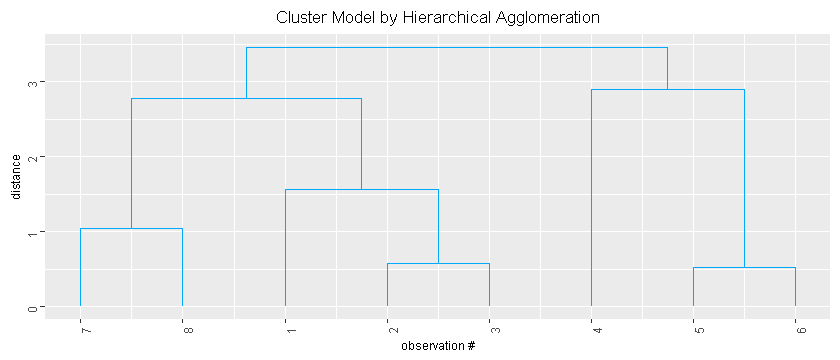

In [85]:
# Visualize the dendrogram associated with hierarchical agglomeration

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

tree = hclust(dist(datax.norm), method="complete")
ggdendrogram(tree, theme_dendro=FALSE) + xlab("observation #") + ylab("distance") + ggtitle("Cluster Model by Hierarchical Agglomeration")

In [87]:
# Construct cluster model using k-means

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

number_of_classes = 5

set.seed(12345)
datax$class = kmeans(datax.norm, number_of_classes, nstart=1000)$cluster
fmt(datax, "Cluster Model by k-Means")

Cluster Model by k-Means 
 
 
 x1 
 x2 
 x3 
 class 
 
 
 
 
 2.0 
 3.5 
 10.0 
 5 
 
 
 2.5 
 9.0 
 9.0 
 1 
 
 
 4.0 
 8.5 
 10.5 
 1 
 
 
 6.5 
 11.0 
 2.0 
 4 
 
 
 8.0 
 2.5 
 1.5 
 2 
 
 
 9.0 
 1.0 
 1.0 
 2 
 
 
 10.0 
 4.0 
 9.5 
 3 
 
 
 10.5 
 7.5 
 11.0 
 3

## What You Should Now Know

* Applications of cluster models.
* How different cluster model construction methods can result in different cluster models.
* How the same cluster model construction method can result in different cluster models.
* The effect of multiple variables on cluster models.
* How to construct a cluster model using gaussian mixture model estimation, hierarchical agglomeration, and kmeans, using R.
* How to visualization a dendrogram associated with hierarchical agglomeration, using R.
* How to calculate mean intracluster diffusion, mean intercluster diffusion, and diffusion ratio, conceptually and using R.
* How to evaluate the quality of cluster models in terms of observation similarity/dissimilarity and in terms of business value.
* How to explore the sensitivity of business parameter values to the business value of a cluster model.

## Further Reading

* http://www.business-science.io/business/2016/08/07/CustomerSegmentationPt1.html
* _More further reading coming soon..._

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised February 16, 2021
</span>
</p>